<a href="https://colab.research.google.com/github/jfpablos/TFM/blob/master/pruebaWebScraping/pruebaWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ENTORNO

In [0]:
from __future__ import print_function
import pandas as pd
pd.set_option('max_colwidth',30)
import requests
from bs4 import BeautifulSoup
import re

In [56]:
!pip install fake-useragent
from fake_useragent import UserAgent

  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built fake-useragent


In [42]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (112 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

In [57]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
ua = UserAgent()
userAgent = ua.random
print(userAgent)
chrome_options.add_argument(f'user-agent={userAgent}')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


## URLs

In [0]:
url = {
    'google': 'https://www.google.com/search?q=ibex+35&lr=&cr=countryES&hl=es&tbs=ctr:countryES&source=lnms&tbm=nws',
    'bing': 'https://www.bing.com/news/search?q=ibex+35&cc=es',
    'yahoo': 'https://es.news.search.yahoo.com/search?p=ibex+35',
    'duck': 'https://duckduckgo.com/?q=ibex+35&t=h_&iar=news&ia=news&kl=es-es&df=d',
    'ask': 'https://www.search.ask.com/search?ctype=news&q=ibex+35',
    'naver': 'https://search.naver.com/search.naver?where=news&query=ibex+35',
    'baidu': 'https://www.baidu.com/s?wd=ibex+35&tn=news&rtt=1',
    'yandex': 'https://news.yandex.com/yandsearch?rpt=nnews2&grhow=clutop&text=ibex%2035',
    'qwant' : 'https://www.qwant.com/?q=ibex+35&t=news&r=ES',
    'ibex': 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'
}

#https://www.bing.com/news/search?q=ibex+35&cc=IT para cambiar de pais se cambia el parametro cc= , pj: cc=IT Italia, cc=ES España, cc=DE Alemania 
#https://www.qwant.com/?q=ibex+35&t=news&r=ES
#https://www.google.com/search?q=ibex+35&lr=&cr=countryDE&hl=es&tbs=ctr:countryDE&tbm=nws  countryDE cambiar este parametro para cambiar de pais p.j para cambiar a Francia countryFR tambien cambiar parametro hl=fr

## Google

In [0]:
def google():
  try:
    page = requests.get(url['google']).text
  except:
    print('hay problemas')  
  soup = BeautifulSoup(page, "html.parser")
  text = [t.find('h3').text + '. ' + t.find(class_="st").text for t in soup.find_all("div", {"class" :"g"})]
  text = ' '.join(text)
  return text
print(google())

El Ibex 35 se anima a media sesión, a la espera de la nueva ....El Ibex 35 se animaba a media sesión con una subida del 0,63%, lo que ha llevado al selectivo a consolidar la cota psicológica de los 9.200 ... El Ibex 35 hoy a mediodía sube un 0,7% impulsado por la banca y ....A mediodía, el principal selectivo del mercado español ganaba 57,10 puntos, el 0,62%, hasta los 9.231,80 enteros, con lo que desde el inicio ... ¿A quién votará el Ibex-35 el 28 de abril?.Pedro Sánchez, Pablo Casado, Albert Rivera, Pablo Iglesias o Santiago Abascal. ¿Qué candidato es el preferido del mercado para ganar las ... El Ibex-35 vuelve a las andadas y recorta con la presión de ....Sesión de altibajos en el selectivo español. Y el desenlace fue negativo. Al cierre daba un último cambio en los 9.174,7 puntos, lo que supone ... El Ibex 35 se da la vuelta a media sesión y se aleja de los 9.200 ....El Ibex 35 retrocedía un 0,14% en la media sesión de este miércoles, situándose en los 9.170,6 puntos en torno a l

## Bing 

In [0]:
def bing():
  page = requests.get(url['bing']).text
  soup = BeautifulSoup(page, "html.parser")
  text = [t.find(class_='title').text + '. ' + t.find(class_='snippet').text for t in soup.find_all('div', class_='t_s')]
  text = ' '.join(text)
  return text
print(bing())

El Ibex 35 coge carrerilla a media sesión y se afianza por encima de los 9.200 puntos. MADRID (EP). El Ibex 35 se animaba a media sesión con una subida del 0,63%, lo que ha llevado al selectivo a consolidar la cota psicológica de los 9.200 puntos que perdía ayer al cierre, en una ... El Ibex 35 intenta cerrar la semana por encima delos 9.200 puntos. El Ibex 35 abre la sesión en positivo, recuperando los 9.200 puntos que perdió en la jornada de ayer. Dentro del selectivo, Arcelormittal encabeza las pérdidas, mientras que Aena sufre llas ... Economía/Bolsa.- El Ibex 35 se anima a media sesión y consolida los 9.200 puntos. El Ibex 35 se animaba a media sesión con una subida del 0,63%, lo que ha llevado al selectivo a consolidar la cota psicológica de los 9.200 puntos que perdía ayer al cierre, en una jornada marcada de ... El Ibex 35 avanza un 0,6% al comienzo del viernes. El Ibex 35 ha avanzado un 0,6% al comienzo del viernes. La Bolsa de Madrid abría la última sesión de la semana con su

In [0]:
print(bing.status_code)

## Yahoo

In [0]:
def yahoo():
  page = requests.get(url['yahoo']).text
  soup = BeautifulSoup(page, "html.parser")
  text = [p.find('h3').text + '. ' + p.find('p').text for p in soup.find(class_='searchCenterMiddle').find_all('li')]
  if not text:
    yahoo()
  else:
    continue
  text = ' '.join(text)
    
  return text

print(yahoo())

Ibex 35, en directo: subidas en Bolsa, con avances en la negociación comercial y un ojo puesto en Londres.La libra sube frente al dólar tras las pérdidas del jueves  El Ibex repunta ante perspectivas favorables de acuerdo comercial EEUU-China.El Ibex-35 inició la última sesión de la semana y el mes con un avance del 0,5 p...  La Bolsa española mantiene ganancias del 0,36 % animada por EE.UU. y China.Madrid, 29 mar (EFE). La Bolsa española mantiene ganancias del 0,36 % minutos de la apertura de la sesión, animada por el optimismo sobre las negociaciones comerciales entre EEUU y China. En ...  El Ibex pierde los 9.200 puntos con Wall Street plano.17: horas. El Ibex por debajo de los 9.200 puntos en la recta finalEl principal indicador la Bolsa española, el Ibex 35, encara la última media hora de cotización por debajo de los 9.200 puntos ...  El Ibex 35 cierra plano lastrado por la mala sesión del sector bancario.Mientras las Bolsas europeas suben de forma más decidida, el Ibex cierra con

## Duck

In [76]:
def duck():
  wd.get(url['duck'])
  text = [t.text for t in wd.find_elements_by_xpath("//div[@class='results js-vertical-results']/div/div/h2/a")]
  text = list(filter(None, text))
  text = ' '.join(text)
  return text

print(duck())

El IBEX 35 baja un 0,59 %, preocupado por el petróleo y el "brexit" El IBEX pierde el 0,45 % tras la apertura y también los 9.500 puntos El Ibex 35 ultima el baile de auditoras que forzó la crisis El Ibex cae y pierde los 9.500 puntos en la semana clave del Brexit El Ibex cede terreno ante prudencia tras reciente racha alcista - Reuters Las acciones de Aena pierden los 160 euros tras un recorte de RBC Capital - elEconomista.es El Ibex abre la sesión a la baja y pierde los 9.500 puntos


## qwant

In [77]:

def qwant():
  wd.get(url['qwant'])
  text = [t.text for t in wd.find_elements_by_xpath("//div[@class='result-type__news__item']/div[@class='result-type__news__text--container']/a")]
  text = ' '.join(text)
  return text

print(qwant())

## Ibex

In [0]:
def ibex():
  page = requests.get(url['ibex']).text 
  soup = BeautifulSoup(page, "lxml")
  tabla = soup.find('table', attrs={'id': 'ctl00_Contenido_tblÍndices'})
  name=""
  price=""
  nroFila=0
  for fila in tabla.find_all("tr"):
      if nroFila==1:
          nroCelda=0
          for celda in fila.find_all('td'):
              if nroCelda==0:
                  name=celda.text
                  print("Indice:", name)
              if nroCelda==2:
                  price=celda.text
                  print("Valor:", price)
              nroCelda=nroCelda+1
      nroFila=nroFila+1
  return price
      
ibex()

Indice: IBEX 35®
Valor: 9.464,80


'9.464,80'

## DATA FRAME

In [27]:
google = google()
bing = bing()
yahoo = yahoo()
duck = duck()
qwart = qwant()


NameError: ignored

In [0]:
subscription_key = '86474408dad14988a42c985c86c2a9b5'
text_analytics_base_url = "https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/"
sentiment_api_url = text_analytics_base_url + "sentiment"
documents = {'documents' : [
  {'id': '1', 'language': 'es', 'text': google},
  {'id': '2', 'language': 'es', 'text': yahoo},  
  {'id': '3', 'language': 'es', 'text': duck},  
  {'id': '4', 'language': 'es', 'text': qwart}
]}
from pprint import pprint
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
languages = response.json()
pprint(languages)

{'documents': [{'id': '1', 'score': 0.5279329419136047},
               {'id': '2', 'score': 0.5250626802444458},
               {'id': '3', 'score': 0.5374531745910645},
               {'id': '4', 'score': 0.5757575631141663}],
 'errors': []}


In [0]:
score = []
for i in languages['documents']:
  score.append(i['score'])
  
print(score)

[0.5279329419136047, 0.5250626802444458, 0.5374531745910645, 0.5757575631141663]


In [0]:
# df = pd.DataFrame.from_dict(dic, orient='index')
#df = pd.DataFrame(dic, index=[pd.to_datetime('now')])
#print(df.google['2019-03-15 08:17:47'])
#print(df.head())
dateNow = pd.to_datetime('now')
dic2 = {
    (dateNow, 'text'): {'google': google, 'bing': bing, 'yahoo': yahoo, 'duck': duck, 'qwart': qwart},
    (dateNow, 'sentiment'): {'google': score[0], 'bing': score[0], 'yahoo': score[1], 'duck': score[2], 'qwart': score[3]}
}
df2 = pd.DataFrame.from_dict(dic2, orient="index")
df2.head()



google  \
2019-03-20 14:46:00 sentiment                       0.527933   
                    text       El Ibex 35 abre con pérdid...   

                                                        bing  \
2019-03-20 14:46:00 sentiment                       0.527933   
                    text       <function bing at 0x7fbfbe...   

                                                       yahoo  \
2019-03-20 14:46:00 sentiment                       0.525063   
                    text       El IBEX sube un 0,03 por c...   

                                                        duck  \
2019-03-20 14:46:00 sentiment                       0.537453   
                    text       El IBEX sube un 0,03 por c...   

                                                       qwart  
2019-03-20 14:46:00 sentiment                       0.575758  
                    text       El Ibex 35 abre con pérdid...

In [0]:
dic3 = {
    (pd.to_datetime('now'), 'text'): {'google': google, 'bing': bing},
    (pd.to_datetime('now'), 'sentiment'): {'google': 1.5, 'bing': 1.2}
}
df3 = pd.DataFrame.from_dict(dic3, orient="index")
df3.head()

google  \
2019-03-18 18:34:36 sentiment                            1.5   
                    text       El Ibex 35 conquista los 9...   

                                                        bing  
2019-03-18 18:34:36 sentiment                            1.2  
                    text       El Ibex-35 cierra por enci...

In [0]:
df4 = df2.append(df3)
df4.head()

bing  \
2019-03-18 18:33:26 sentiment                            1.2   
                    text       El Ibex-35 cierra por enci...   
2019-03-18 18:34:36 sentiment                            1.2   
                    text       El Ibex-35 cierra por enci...   

                                                        duck  \
2019-03-18 18:33:26 sentiment                            1.4   
                    text       El Ibex-35 cierra por enci...   
2019-03-18 18:34:36 sentiment                            NaN   
                    text                                 NaN   

                                                      google  \
2019-03-18 18:33:26 sentiment                            1.5   
                    text       El Ibex 35 conquista los 9...   
2019-03-18 18:34:36 sentiment                            1.5   
                    text       El Ibex 35 conquista los 9...   

                                                       qwart  \
2019-03-18 18:33:26 sentiment                            0.3   
                    text       La fusión de Deutsche Bank...   
2019-03-18 18:34:36 sentiment                            NaN   
                    text                                 NaN   

                                                       yahoo  
2019-03-18 18:33:26 sentiment                            1.3  
                    text       El Ibex-35 cierra por enci...  
2019-03-18 18:34:36 sentiment                            NaN  
                    text                                 NaN

In [0]:
#@title Texto de título predeterminado
df4.xs('2019-03-18 15:22:31').loc['text']['google']

'La banca impulsa al Ibex 35 por encima de los 9.400 puntos: se ...En la misma línea lo hace el Ibex 35 al registrar alzas moderadas con las que amplía los máximos anuales que alcanzó el pasado viernes. El Ibex 35 abre la semana con tímidas subidas, con toda la banca ...El Ibex 35 ha iniciado la sesión de este lunes con una subida del 0,1%, lo que ha llevado al selectivo a situarse en los 9.351,2 enteros a las\xa0... Ibex 35: ahora o nuncaEste viernes el Ibex cerró en los máximos de la sesión y, adenñas, lo hizo con un volumen de contratación muy alto. En parte, como\xa0... El IBEX 35 sube un 0,40 % y marca un nuevo máximo anual, en ...El principal indicador de la Bolsa española, el IBEX 35, subía un 0,40 % tras la apertura y se situaba en 9.380 puntos, con lo que marcaba un\xa0... El Ibex 35 arranca la semana en los 9.350El Ibex 35 prolonga la racha y ha abierto con subidas del 0,09% que le colocan con los 9.350 puntos, algo impensable hace solo tres meses. Las empresas del Ibex 35 ti

In [0]:
df4.to_csv('prueba.csv')

In [0]:
dateNow = pd.to_datetime('now')
dic_sentiment = {dateNow: {'google': 1.5, 'bing': 1.2, 'yahoo': 1.3, 'duck': 1.4, 'qwart': 0.3, 'ibex': ibex()}
}
df_sentiment = pd.DataFrame.from_dict(dic_sentiment, orient="index")
df_sentiment.head()

Indice: IBEX 35®
Valor: 9.464,20


,google,bing,yahoo,duck,qwart,ibex
2019-03-20 12:17:44,1.5,1.2,1.3,1.4,0.3,"9.464,20"


## Ask

In [0]:
def ask():
  page = requests.get(url['ask']).text
  soup = BeautifulSoup(page, "html.parser")
  texto = [' '.join((t.find(class_='news-title').text + t.find(class_='news-summary').text).split()) for t in soup.find_all('div', class_="news-content")]
  return texto
  
print(ask())

['Day of gains on Spanish Ibex-35 stock exchange MADRID, March 6 (Xinhua) -- The Spanish Ibex-35 stock exchange on Wednesday enjoyed a day of gains after two days of slight losses and although it was... More »', "Small loss seen on Spanish Ibex-35 stock exchange MADIRD, March 5 (Xinhua) -- The Spanish Ibex-35 stock exchange registered a very small loss on Tuesday's trading. Trading in Madrid closed on... More »", 'IBEX TECHNOLOGIES : Reports Plans to Close Iowa Production Facility IBEX Technologies Inc. (IBEX or the Company) (TSX Venture: IBT) today reported that it plans to close its Iowa production facility as of July 31,... More »', "Why did Instagram, YouTube and WhatsApp stop working? 35 minutes ago35 minutes ago Lots of people rely on sites like Instagram, Facebook, WhatsApp, YouTube, or Gmail, to send messages or stay up to date with what's happening, so it... More »", "Cheesy Easter egg and other unusual eggs 35 minutes ago35 minutes ago comments Sainsbury's There's a twist on 

## Naver

In [0]:
naver = requests.get(url_naver).text
soapNaver = BeautifulSoup(naver, "html.parser")

## Yandex

In [0]:
yandex = requests.get(url_yandex).text
soapYandex = BeautifulSoup(yandex, "html.parser")

## Baidu

In [0]:
try:
    baidu = requests.get(url_baidu).text
except:
    print("error en baidu")

In [0]:
soupBaidu = BeautifulSoup(baidu, "html.parser")
for text in soupBaidu.find_all('div', class_="c-summary"):
    result = text.get_text()
    print(result)

## Pruebas 

In [0]:
html_doc = """<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb"><a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ"><img class="th BbeB2d" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot" alt="Imagen de la noticia para ibex 35 de La Vanguardia" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" data-atf="3"></a><div class="gG0TJc"><h3 class="r dO0Ag"><a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqQIILSgAMAE">El <em>Ibex 35</em> abre en rojo y ve cada vez más difícil los 9.000 puntos</a></h3><div class="slp"><span class="xQ82C e8fRJf">La Vanguardia</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 2 horas</span></div></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://okdiario.com/economia/mercados/2019/02/08/ibex-35-hoy-cae-alrededor-03-aferra-8-900-puntos-3680697&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC4oATAB">El <em>Ibex 35</em> hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos</a><br><span class="nsa xQ82C f e8fRJf">OKDIARIO</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 2 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.europapress.es/economia/bolsa-00348/noticia-ibex-35-cae-031-apertura-aferra-8900-enteros-20190208091215.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCC8oAjAB">El <em>Ibex 35</em> cae un 0,31% en la apertura y se aferra a los 8.900 enteros</a><br><span class="nsa xQ82C f e8fRJf">Europa Press</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 3 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://valenciaplaza.com/duro-castigo-a-un-ibex-35-que-vuelve-a-alejarse-de-los-9000-puntos&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDAoAzAB">Duro castigo a un <em>Ibex 35</em> que vuelve a alejarse de los 9.000 puntos</a><br><span class="nsa xQ82C f e8fRJf">valenciaplaza.com</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 17 horas</span></div><div class="gZQpfd"></div><div class="YiHbdc card-section"><a class="RTNUJf" href="https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.estrategiasdeinversion.com/actualidad/noticias/bolsa-espana/seis-valores-del-ibex-35-que-reunen-calidad-y-n-417857&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQu4gBCDEoBDAB">Seis valores del <em>Ibex 35</em> que reúnen calidad y potencial a precios ...</a><br><span class="nsa xQ82C f e8fRJf">Estrategias de Inversión</span><span class="v0c3xd">-</span><span class="nsa fwzPFf f">Hace 5 horas</span></div><div class="gZQpfd"></div><div class="ErI7Gd card-section"><a class="RTNUJf" href="http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.expansion.com/mercados/cronica-bolsa/2019/02/07/5c5bd713ca4741be598b4586.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQuogBCDIoBTAB">El <em>Ibex 35</em> pierde el 9.000 por las dudas sobre la economía europea</a><br><span class="HgetDe DwKiF">Opinión</span><span class="v0c3xd">-</span><span class="xQ82C e8fRJf">Expansión.com</span><span class="v0c3xd">-</span><span class="f nsa fwzPFf">Hace 18 horas</span><div class="cWEW3c"><a class="kl0Osd" href="https://news.google.com/news?ncl=d7Fc1Sx28KNHs8M89HhSUoxVcAN6M&amp;q=ibex+35&amp;lr=Spanish&amp;hl=es&amp;sa=X&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQqgIIMzAB">Ver todos</a></div></div><div class="gZQpfd"></div></div>"""
soup = BeautifulSoup(html_doc, 'html.parser')

In [0]:
print(soup.prettify())

<div class="ts Pg8zWb b80nOe C1Iii FddHQd tsUanb">
 <a class="top NQHJEb dfhHve" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html&amp;ved=0ahUKEwjDiJnVgKzgAhUNgHMKHXboAgYQvIgBCCwwAQ">
  <img alt="Imagen de la noticia para ibex 35 de La Vanguardia" class="th BbeB2d" data-atf="3" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKOWOvzVV0g2QYIoCHVcEE3gL0KGhYGGiU6MrtTfX-vjlJu9-ra4r3fp-1QoWQmN_rqRonqot"/>
 </a>
 <div class="gG0TJc">
  <h3 class="r dO0Ag">
   <a class="l lLrAF" href="https://www.lavanguardia.com/economia/20190208/46289945507/ibex-35-dia-bolsa-espana-wall-street.html" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.lavanguardia.com/economia/20190208/46289945507/ibex-3

In [0]:
result=""
for text in soup.find_all('a', 'RTNUJf'):
    result = result + " " + text.get_text()  
print(result)
tokens = [t for t in result.split()]
print (tokens)

 El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos Seis valores del Ibex 35 que reúnen calidad y potencial a precios ... El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
['El', 'Ibex', '35', 'hoy', 'cae', 'alrededor', 'de', 'un', '0,3%', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'puntos', 'El', 'Ibex', '35', 'cae', 'un', '0,31%', 'en', 'la', 'apertura', 'y', 'se', 'aferra', 'a', 'los', '8.900', 'enteros', 'Duro', 'castigo', 'a', 'un', 'Ibex', '35', 'que', 'vuelve', 'a', 'alejarse', 'de', 'los', '9.000', 'puntos', 'Seis', 'valores', 'del', 'Ibex', '35', 'que', 'reúnen', 'calidad', 'y', 'potencial', 'a', 'precios', '...', 'El', 'Ibex', '35', 'pierde', 'el', '9.000', 'por', 'las', 'dudas', 'sobre', 'la', 'economía', 'europea']


In [0]:
import nltk
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
clean_tokens = [word for word in tokens if word.lower() not in stopwords.words('spanish')]
print(clean_tokens)

['Ibex', '35', 'hoy', 'cae', 'alrededor', '0,3%', 'aferra', '8.900', 'puntos', 'Ibex', '35', 'cae', '0,31%', 'apertura', 'aferra', '8.900', 'enteros', 'Duro', 'castigo', 'Ibex', '35', 'vuelve', 'alejarse', '9.000', 'puntos', 'Seis', 'valores', 'Ibex', '35', 'reúnen', 'calidad', 'potencial', 'precios', '...', 'Ibex', '35', 'pierde', '9.000', 'dudas', 'economía', 'europea']


In [0]:
freq = nltk.FreqDist(clean_tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

Ibex:5
35:5
hoy:1
cae:2
alrededor:1
0,3%:1
aferra:2
8.900:2
puntos:2
0,31%:1
apertura:1
enteros:1
Duro:1
castigo:1
vuelve:1
alejarse:1
9.000:2
Seis:1
valores:1
reúnen:1
calidad:1
potencial:1
precios:1
...:1
pierde:1
dudas:1
economía:1
europea:1


In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\46856585\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
for a in soup.select('a'):
    print(a.text)


El Ibex 35 abre en rojo y ve cada vez más difícil los 9.000 puntos
El Ibex 35 hoy cae alrededor de un 0,3% y se aferra a los 8.900 puntos
El Ibex 35 cae un 0,31% en la apertura y se aferra a los 8.900 enteros
Duro castigo a un Ibex 35 que vuelve a alejarse de los 9.000 puntos
Seis valores del Ibex 35 que reúnen calidad y potencial a precios ...
El Ibex 35 pierde el 9.000 por las dudas sobre la economía europea
Ver todos


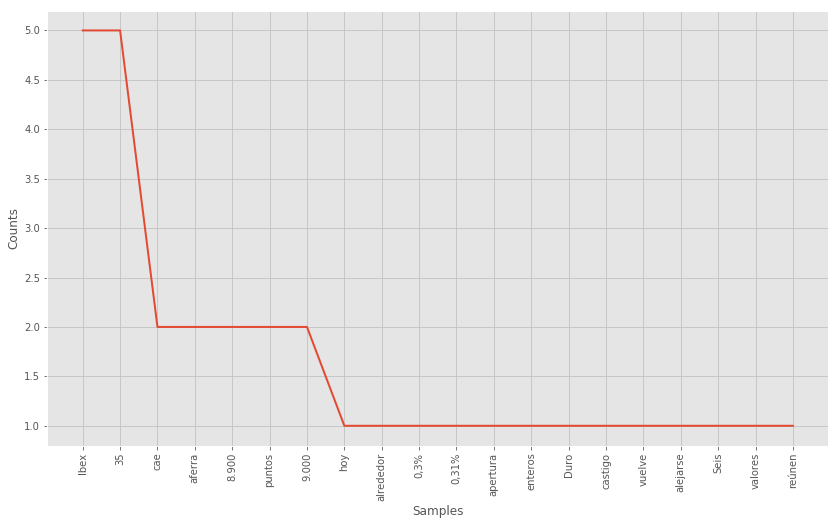

In [0]:
plt.figure(figsize=(14,8))
freq.plot(20, cumulative=False)

### Fecha y calendario

In [0]:
import datetime
print(type(datetime.datetime.now()))

print(datetime.date.today())
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

<class 'datetime.datetime'>
2019-03-12
2019-03-12 11:28


In [0]:
import pandas as pd

print(pd.to_datetime('today'))
print(type(pd.to_datetime('today')))
print(pd.to_datetime('now'))
print(pd.Timestamp("today"))
print(type(pd.Timestamp("today")))

2019-03-12 00:00:00
<class 'pandas._libs.tslib.Timestamp'>
2019-03-12 11:41:15
2019-03-12 11:41:15.842078
<class 'pandas._libs.tslib.Timestamp'>


In [0]:
import calendar
import requests
 
cal = calendar.Calendar()
 

for year in range(2008, 2009):
    for month in range(1, 13):
        monthdays = [d for d in cal.itermonthdays(year, month) if d != 0]
        for day in monthdays:
            print(day, year)

### Dato vacio: rellenar

In [0]:
df_s3 = pd.read_csv("s3://webscraping-buscadores/scrapBuscadores.csv", parse_dates=True, index_col=0)
df_s3

In [94]:
qwart = qwant()
qwart

''

In [0]:
df_s3.loc['2019-04-08']['qwart'] = qwart

In [111]:
df_s3

,google,bing,yahoo,duck,qwart
date,,,,,
2019-04-02 06:32:18.008319,"Banca, eléctricas, energía...",El Ibex-35 rebasa lo 9.300...,"Ibex 35, en directo: regre...","Ibex 35, en directo: regre...","Ibex 35, en directo: regre..."
2019-04-03 07:01:29.719095,¿Oportunidad en los valore...,El Ibex-35 choca con los 9...,El Ibex resiste en verde a...,El Ibex resiste en verde a...,¿Oportunidad en los valore...
2019-04-04 06:17:13.820924,Los bancos aúpan al Ibex 3...,El Ibex-35 cierra en máxim...,El Ibex 35 asegura los 9.4...,El Ibex 35 asegura los 9.4...,El Ibex-35 cierra en máxim...
2019-04-05 06:03:11.708111,El Ibex 35 recupera los 9....,El Ibex 35 duda a un paso ...,El IBEX 35 marca un nuevo ...,El IBEX 35 marca un nuevo ...,La recuperación del Ibex 3...
2019-04-08 06:36:31.530514,Las empresas del Ibex 35 r...,El Ibex 35 ultima el baile...,"Ibex 35, en directo: vuelv...",El Ibex 35 ultima el baile...,


In [0]:
df_s3.to_csv('scrapBuscadores.csv')

In [0]:
import boto3
ACCESS_KEY= ''
SECRET_KEY = ''
s3 = boto3.resource('s3', aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY)
s3.meta.client.upload_file('scrapBuscadores.csv', 'webscraping-buscadores', 'scrapBuscadores.csv')

### Llamada a la API

In [0]:
def variosValores(x):
  ''' suponemos que se llama a la api y se devuelven 3 datos'''
  y = len(x)
  z = x.isdigit()
  t = x.count('El')
  
  return y, z, t

In [125]:
df_prueba = pd.DataFrame()
#df_prueba['len_google', 'dig_google'] = df_s3.google.apply(lambda x, y: len(x), x.isdigit() )
df_prueba[['google_pos', 'google_neg', 'google_neu']] = df_s3.google.apply(lambda x: pd.Series(variosValores(x)))
df_prueba

,google_pos,google_neg,google_neu
date,,,
2019-04-02 06:32:18.008319,2091,False,11
2019-04-03 07:01:29.719095,2090,False,8
2019-04-04 06:17:13.820924,2072,False,11
2019-04-05 06:03:11.708111,2102,False,11
2019-04-08 06:36:31.530514,2095,False,6
